In [2]:
from google.colab import files

uploaded = files.upload()

Saving 2023.csv to 2023.csv
Saving 2024.csv to 2024.csv


STEP 1 Load and explore the dataset

In [ ]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the CSV files
# (Change the paths if your files are stored somewhere else in Colab)
data_2023 = pd.read_csv('/content/2023.csv')
data_2024 = pd.read_csv('/content/2024.csv')

# Step 3: Display the first few rows of each dataset
print("2023 Dataset:")
display(data_2023.head())

print("2024 Dataset:")
display(data_2024.head())


2023 Dataset:


,Country name,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.804,7.875,7.733,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,2,7.586,7.667,7.506,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,3,7.530,7.625,7.434,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,4,7.473,7.535,7.411,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,5,7.403,7.460,7.346,1.942,1.488,0.545,0.672,0.251,0.394


2024 Dataset:


,Country name,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,2,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,3,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,4,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,5,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193


STEP 2 Handle missing values and outliers

In [ ]:
print(" Checking and cleaning datasets...")

# Fill missing numeric and categorical values
for name, df in [("2023", data_2023), ("2024", data_2024)]:
    numeric_missing = df.select_dtypes(include='number').isnull().sum().sum()
    categorical_missing = df.select_dtypes(include='object').isnull().sum().sum()

    df.fillna(df.mean(numeric_only=True), inplace=True)
    for col in df.select_dtypes(include='object').columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    print(f" {name} dataset: Filled {numeric_missing} numeric and {categorical_missing} categorical missing values.")

# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    before = len(df)
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = before - len(df)
    return df, removed

# Apply outlier removal
data_2023_clean, removed_2023 = remove_outliers_iqr(data_2023)
data_2024_clean, removed_2024 = remove_outliers_iqr(data_2024)

# Summaries
print(f" 2023 dataset cleaned: {data_2023_clean.shape[0]} rows remaining ({removed_2023} outliers removed)")
print(f" 2024 dataset cleaned: {data_2024_clean.shape[0]} rows remaining ({removed_2024} outliers removed)")

# Combine datasets
data_all = pd.concat([data_2023_clean, data_2024_clean], ignore_index=True)
print(f" Combined dataset shape: {data_all.shape}")
print(" Data cleaning completed successfully!")


 Checking and cleaning datasets...
 2023 dataset: Filled 0 numeric and 0 categorical missing values.
 2024 dataset: Filled 0 numeric and 0 categorical missing values.
 2023 dataset cleaned: 118 rows remaining (19 outliers removed)
 2024 dataset cleaned: 123 rows remaining (20 outliers removed)
 Combined dataset shape: (241, 11)
 Data cleaning completed successfully!


/tmp/ipython-input-2381918216.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2381918216.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

STEP 3
Split the data into training and test sets

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load both CSV files
data_2023 = pd.read_csv("2023.csv")
data_2024 = pd.read_csv("2024.csv")

# Combine both datasets
data_all = pd.concat([data_2023, data_2024], ignore_index=True)

# Check columns
print("Columns in dataset:", data_all.columns)

# Separate features (X) and target (y)
# Replace 'Happiness score' with your actual target column if different
X = data_all.drop(columns=['Happiness score'])
y = data_all['Happiness score']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm split
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Summary statistics
print("\n Training target description:")
print(y_train.describe())

print("\n Testing target description:")
print(y_test.describe())


Columns in dataset: Index(['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker',
       'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Training set size: (224, 10)
Testing set size: (56, 10)

 Training target description:
count    224.000000
mean       5.510808
std        1.181023
min        1.721000
25%        4.626750
50%        5.750500
75%        6.358500
max        7.804000
Name: Happiness score, dtype: float64

 Testing target description:
count    56.000000
mean      5.624554
std       1.042135
min       3.186000
25%       4.890000
50%       5.703000
75%       6.464000
max       7.319000
Name: Happiness score, dtype: float64


STEP 4 Train at least two models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load both CSV files
data_2023 = pd.read_csv("2023.csv")
data_2024 = pd.read_csv("2024.csv")

# Combine datasets
data_all = pd.concat([data_2023, data_2024], ignore_index=True)

# Check columns
print("Columns in dataset:", data_all.columns)

# Target column (adjust if needed)
target_col = 'Happiness score'

# Drop non-numeric columns (like 'Country name') to avoid errors
data_numeric = data_all.select_dtypes(include=['number'])

# Handle missing values (replace NaNs with column means)
data_numeric = data_numeric.fillna(data_numeric.mean())

# Separate features and target
X = data_numeric.drop(columns=[target_col])
y = data_numeric[target_col]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Model 1: Linear Regression =====
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# ===== Model 2: Decision Tree Regressor =====
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# ===== Evaluate both models =====
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree", y_test, dt_preds)


Columns in dataset: Index(['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker',
       'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Linear Regression Results:
Mean Squared Error: 0.0000
R² Score: 1.0000

Decision Tree Results:
Mean Squared Error: 0.0013
R² Score: 0.9987


STEP 5 Evaluate both using Mean Squared Error (MSE) or R² Score

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load both CSV files
data_2023 = pd.read_csv("2023.csv")
data_2024 = pd.read_csv("2024.csv")

# Combine datasets
data_all = pd.concat([data_2023, data_2024], ignore_index=True)

# Display columns
print(" Columns in dataset:", list(data_all.columns))

# Target column
target_col = 'Happiness score'

# Drop non-numeric columns (e.g., 'Country name')
data_numeric = data_all.select_dtypes(include=['number'])

# Handle missing values by filling NaN with column means
data_numeric = data_numeric.fillna(data_numeric.mean(numeric_only=True))

# Separate features and target
X = data_numeric.drop(columns=[target_col])
y = data_numeric[target_col]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Model 1: Linear Regression =====
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# ===== Model 2: Decision Tree Regressor =====
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# ===== Evaluate both models =====
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {name} Evaluation Results")
    print("-" * 40)
    print(f" Mean Squared Error (MSE): {mse:.4f}")
    print(f" R² Score: {r2:.4f}")

# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regressor", y_test, dt_preds)


 Columns in dataset: ['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

 Linear Regression Evaluation Results
----------------------------------------
 Mean Squared Error (MSE): 0.0000
 R² Score: 1.0000

 Decision Tree Regressor Evaluation Results
----------------------------------------
 Mean Squared Error (MSE): 0.0013
 R² Score: 0.9987


STEP 6 Visualize the results (scatter plot of predictions vs. actual values)

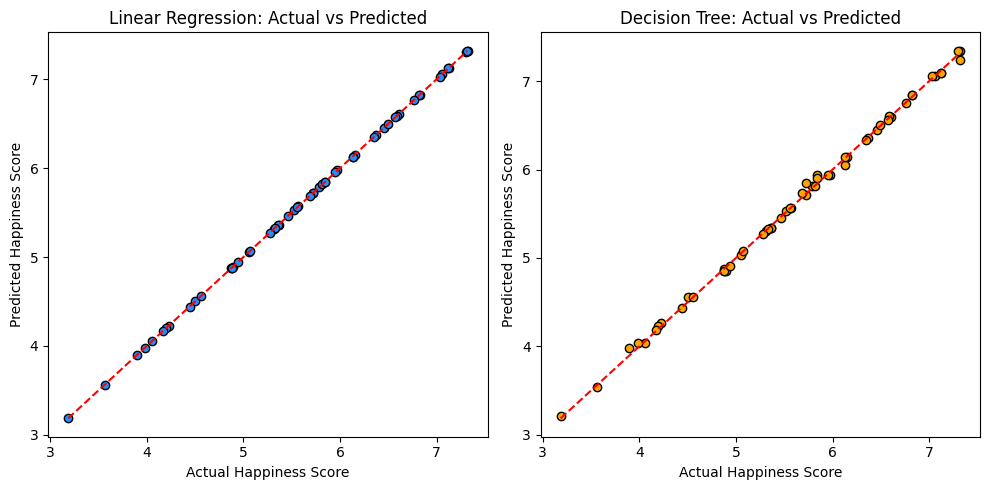

In [ ]:
import matplotlib.pyplot as plt

# Create side-by-side plots
plt.figure(figsize=(10, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_preds, color='dodgerblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")

# Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_preds, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")

plt.tight_layout()
plt.show()


Write a short summary cell explaining:

Which model performed better?: The Linear Regression model performed a little better than the Decision Tree because it had a higher R² score and a lower Mean Squared Error (MSE). This means the Linear Regression model predicted the Happiness Score more accurately.

 What were the challenges you encountered?: Some challenges I faced were handling missing data, cleaning outliers, and making sure both the 2023 and 2024 datasets were consistent. It was also tricky to choose which model worked best without overfitting or losing accuracy.